In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
dataFile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\signal_data_total_v1.csv'

In [3]:
myData=pd.read_csv(dataFile)

In [4]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [5]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [6]:
myData.head()

,Unnamed: 0,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,nucleus_Otsu_inner_ch2,nucleus_Otsu_inner_ch3,nucleus_Otsu_outer_volume,nucleus_Otsu_outer_ch1,nucleus_Otsu_outer_ch2,nucleus_Otsu_outer_ch3,nucleus_otsu_sphere_inner_volume,nucleus_otsu_sphere_outer_volume,age_track,day
0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,MCM3,...,158746493.0,1.246769e+09,322121.0,2.099590e+09,1.003047e+09,7.687183e+09,0.0,0.0,0.666667,d20190625
1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,MCM3,...,183584081.0,1.457227e+09,321844.0,1.981743e+09,9.790310e+08,8.090406e+09,0.0,0.0,0.666667,d20190625
2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,MCM3,...,229507070.0,1.469553e+09,287538.0,2.365673e+09,1.121201e+09,8.483717e+09,0.0,0.0,2.000000,d20190625
3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,MCM3,...,232045174.0,1.484302e+09,298383.0,2.060637e+09,1.039858e+09,7.789178e+09,0.0,0.0,2.000000,d20190625
4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,MCM3,...,291875166.0,2.993056e+09,602406.0,5.265607e+09,1.386750e+09,1.656457e+10,0.0,0.0,19.500000,d20190625


In [7]:
indexNames = myData[ myData['hetChrom_newctl_volume'] == 0 ].index

In [8]:
myData=myData.drop(indexNames)

In [9]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [10]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [11]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [12]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# plot to compare inner and outer

<IPython.core.display.Javascript object>


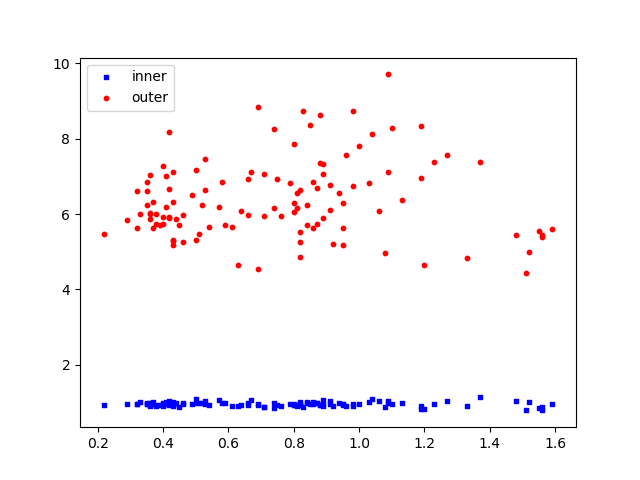

In [13]:
%matplotlib notebook
x = myDataSel.molecularAge_ratio
y1 = (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
y2=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=10, c='b', marker="s", label='inner')
ax1.scatter(x,y2, s=10, c='r', marker="o", label='outer')
plt.legend(loc='upper left');
plt.show()

# plots for deconvolved

## original

In [14]:
np.mean(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)

0.34464560656320353

<IPython.core.display.Javascript object>


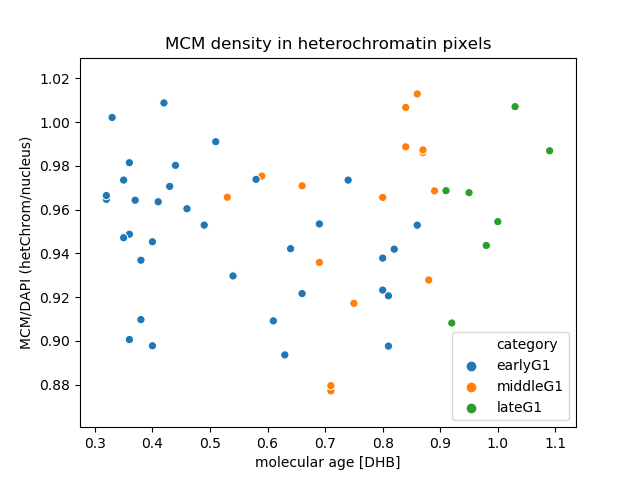

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [15]:
### doing it right
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


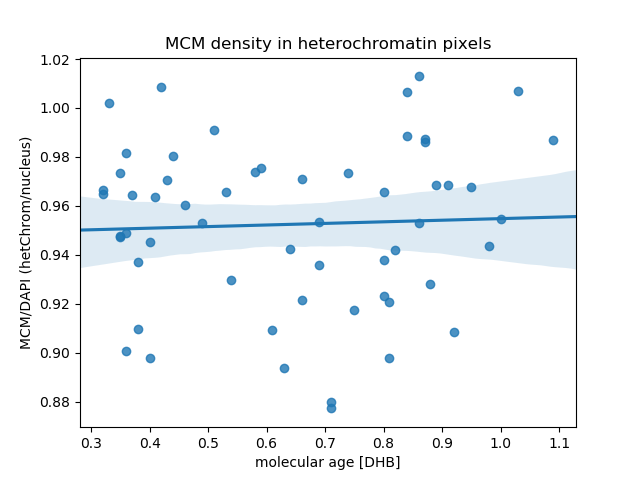

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [16]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [17]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [18]:
myTrendData=myTrendData.append(pd.Series(['original_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### outer

<IPython.core.display.Javascript object>


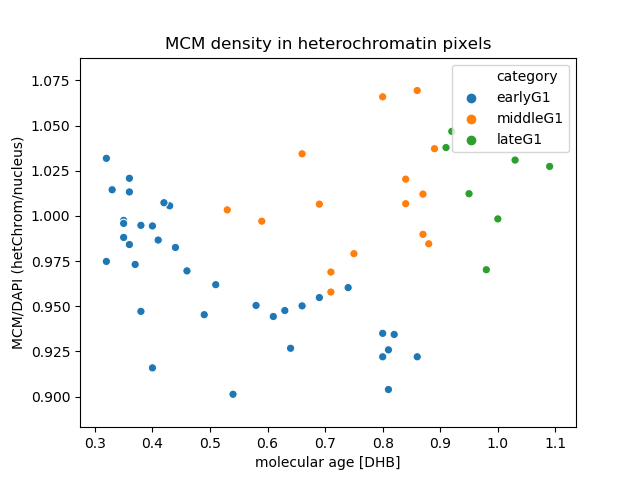

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [19]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


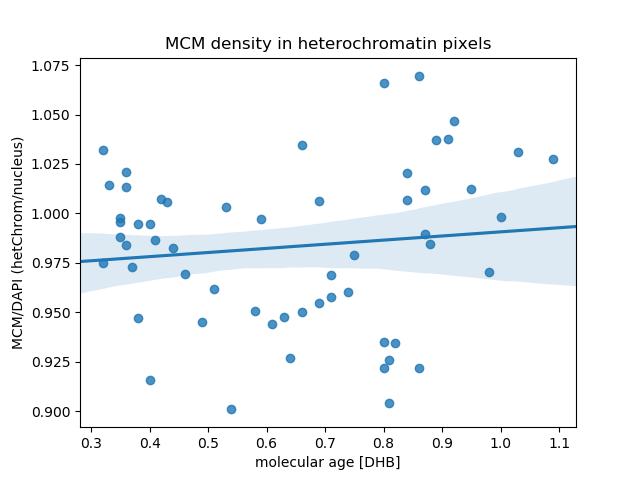

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [20]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [21]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [22]:
myTrendData=myTrendData.append(pd.Series(['original_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## Modification

### modification = 0.3, inner

In [23]:
mod=0.3

In [24]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


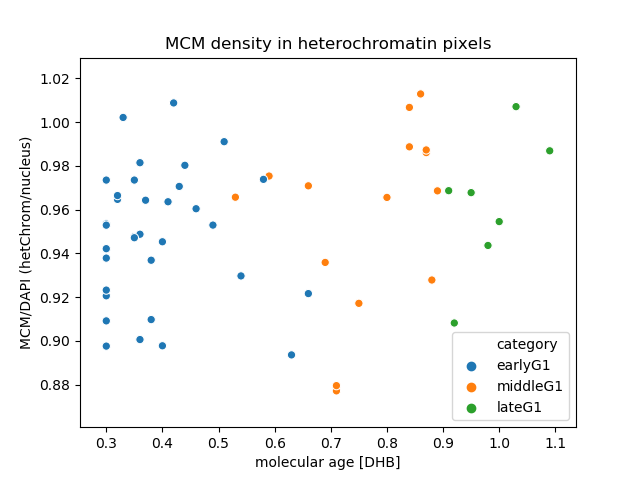

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [25]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


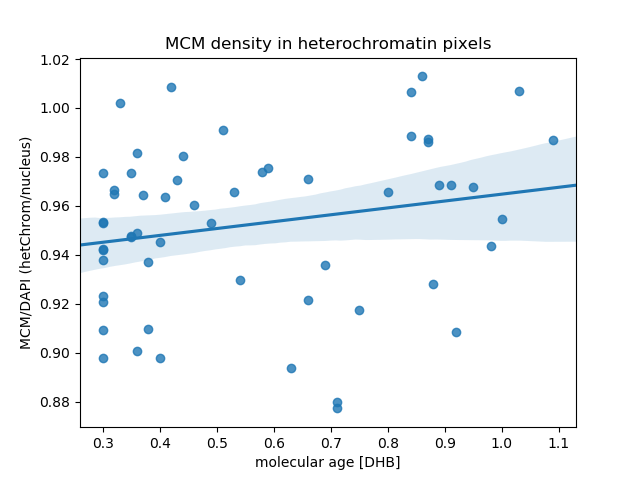

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [26]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [27]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [28]:
myTrendData=myTrendData.append(pd.Series(['0.3_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### mod=0.3, outer

<IPython.core.display.Javascript object>


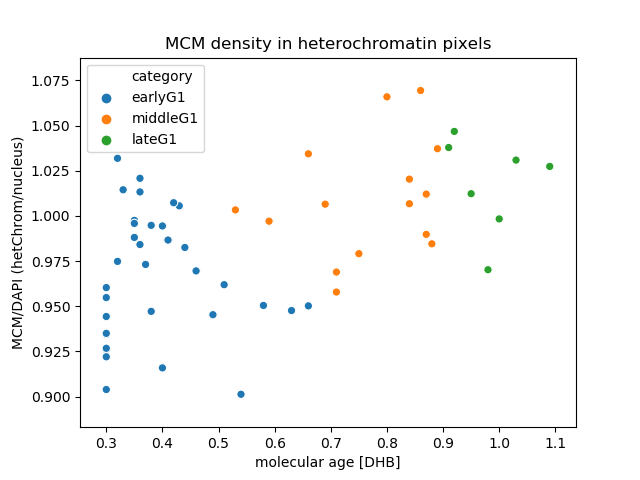

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [29]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


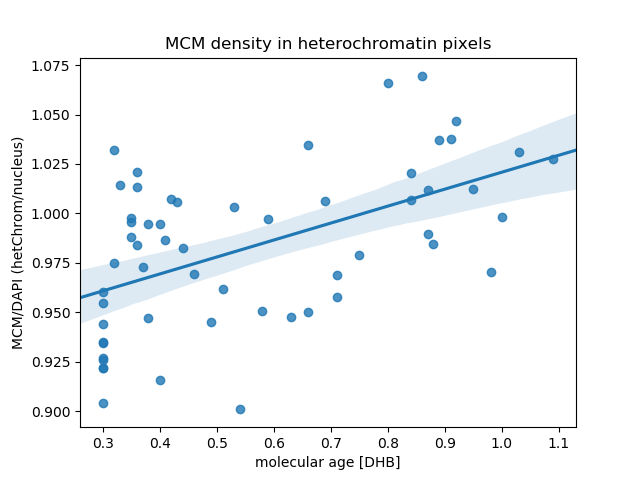

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [31]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [32]:
myTrendData=myTrendData.append(pd.Series(['0.3_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0, inner

In [33]:
mod=0

In [34]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


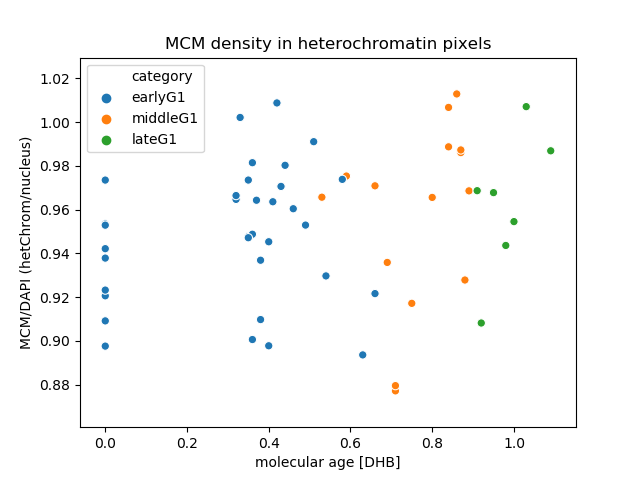

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [35]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


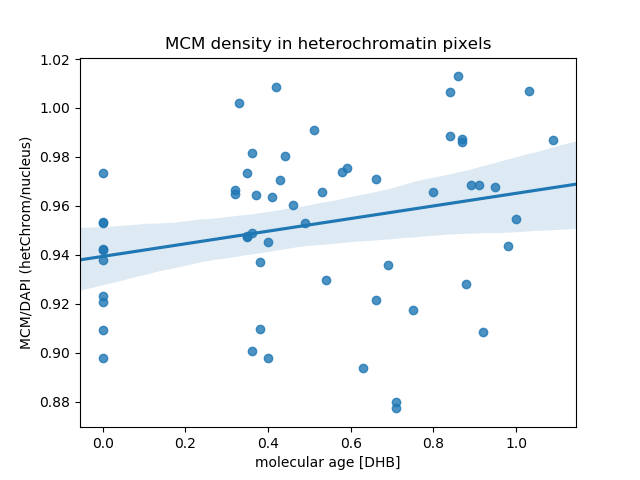

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [37]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [38]:
myTrendData=myTrendData.append(pd.Series(['0_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### mod=0, outer

<IPython.core.display.Javascript object>


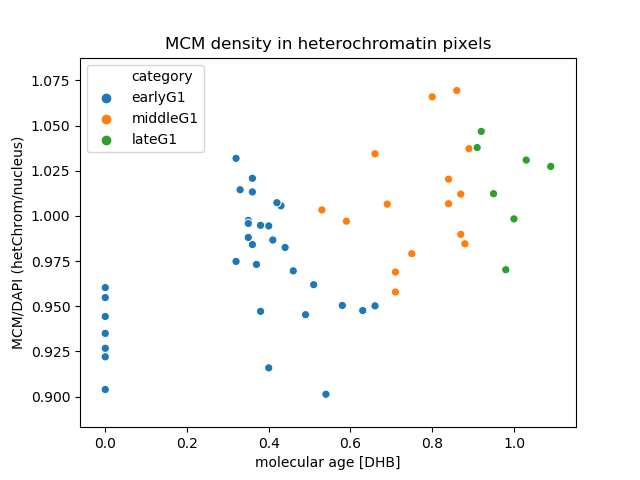

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [39]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


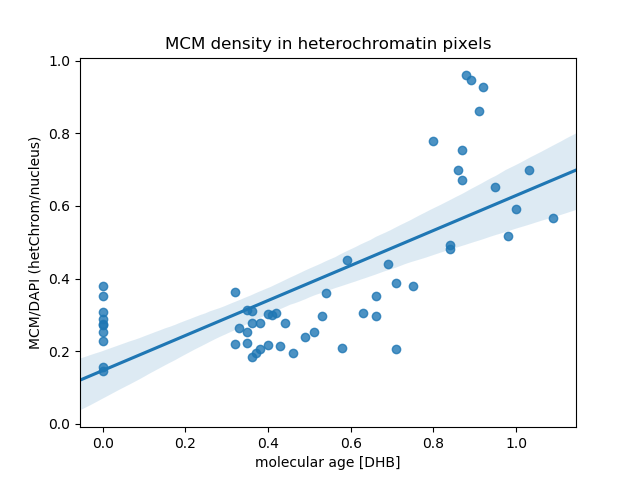

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [40]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.hetChrom_sphere_outer_20_volume)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.hetChrom_sphere_outer_20_volume)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [41]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [42]:
myTrendData=myTrendData.append(pd.Series(['0_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, inner

In [43]:
mod=0.5

In [44]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


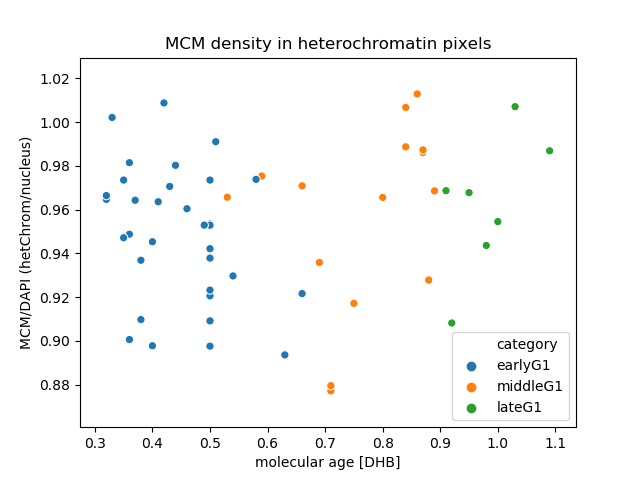

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [45]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


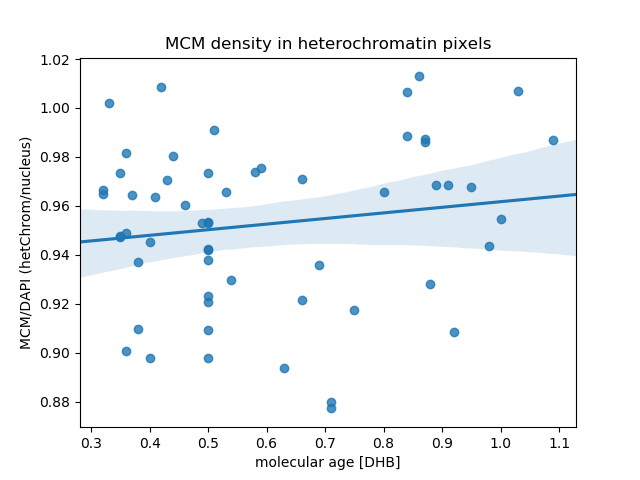

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [46]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [47]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [48]:
myTrendData=myTrendData.append(pd.Series(['0.5_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, outer

<IPython.core.display.Javascript object>


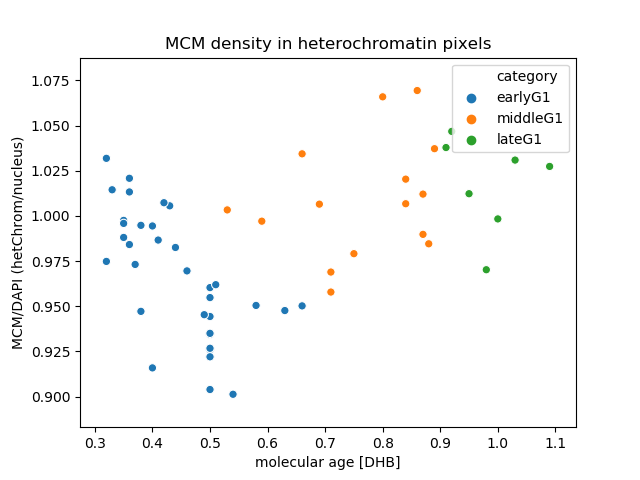

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [49]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


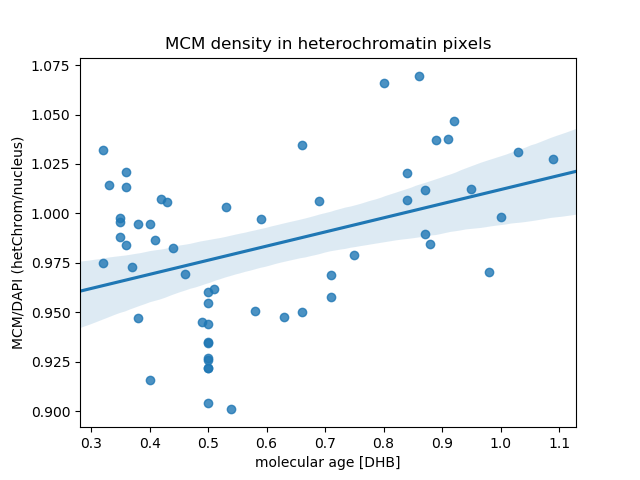

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [50]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [51]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [52]:
myTrendData=myTrendData.append(pd.Series(['0.5_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification, inner

In [53]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']

In [54]:
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


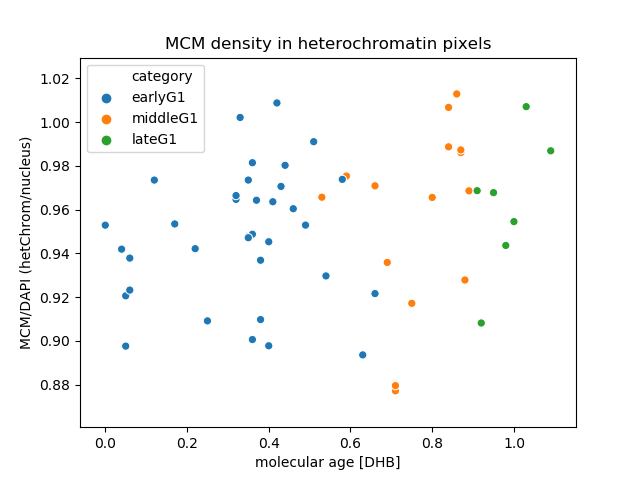

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [55]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


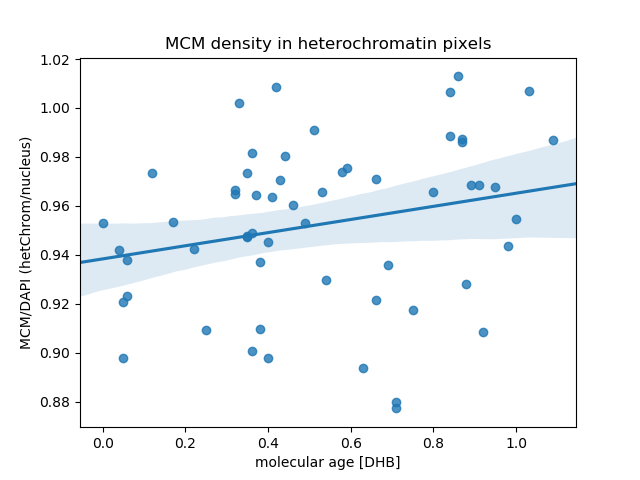

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [56]:
%matplotlib notebook

myDataSel['temp']= (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_inner_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [57]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [58]:
myTrendData=myTrendData.append(pd.Series(['amy_mod_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy mod, outer

<IPython.core.display.Javascript object>


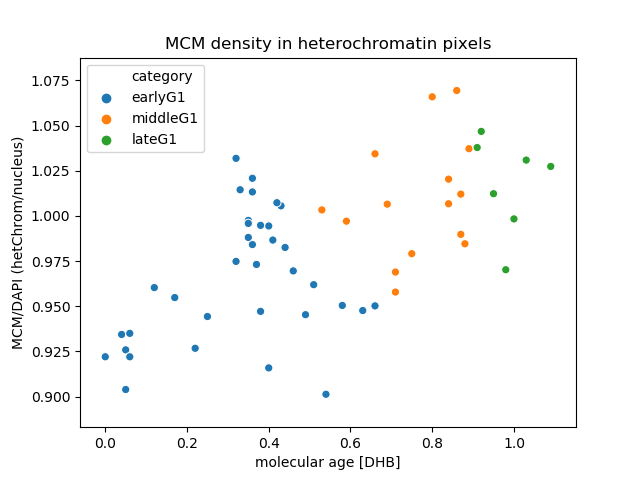

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [59]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


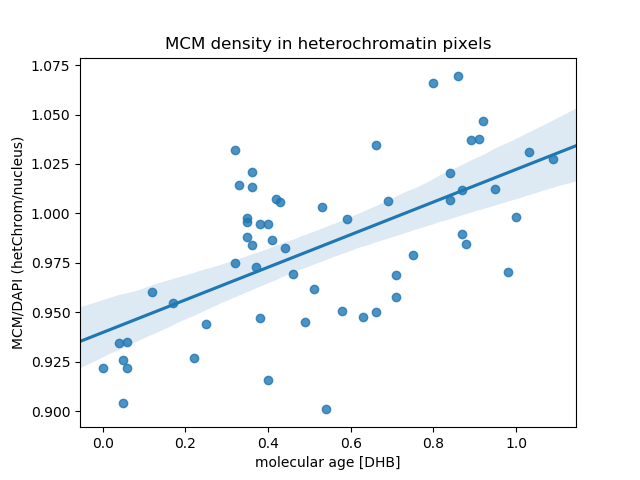

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [60]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_outer_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [61]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [62]:
myTrendData=myTrendData.append(pd.Series(['amy_mod_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# plots for not deconvolved

## original, inner

<IPython.core.display.Javascript object>


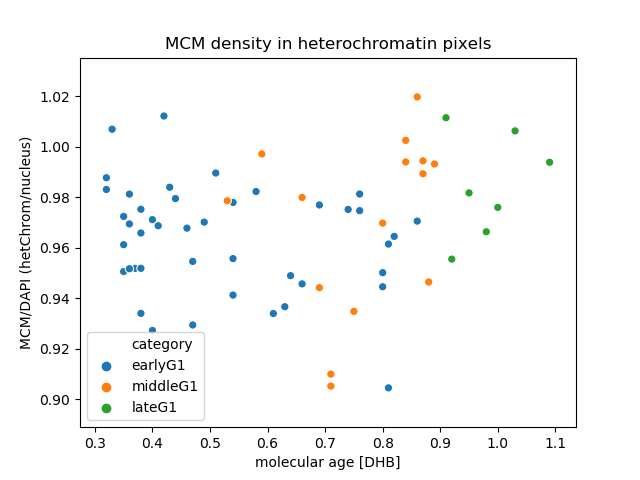

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [63]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


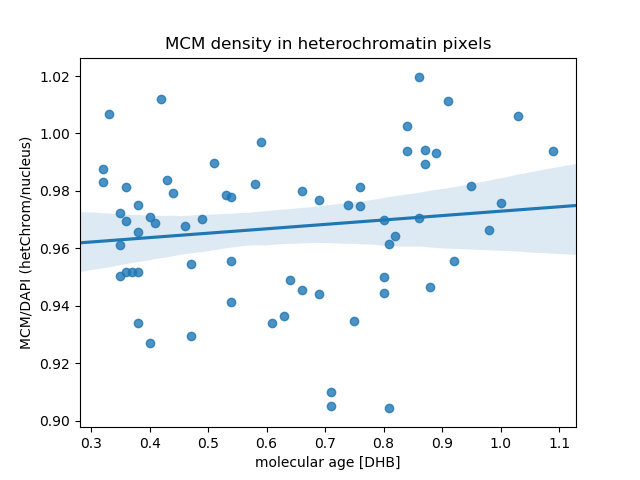

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [64]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [65]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [66]:
myTrendDatand=myTrendDatand.append(pd.Series(['original_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## original, outer

<IPython.core.display.Javascript object>


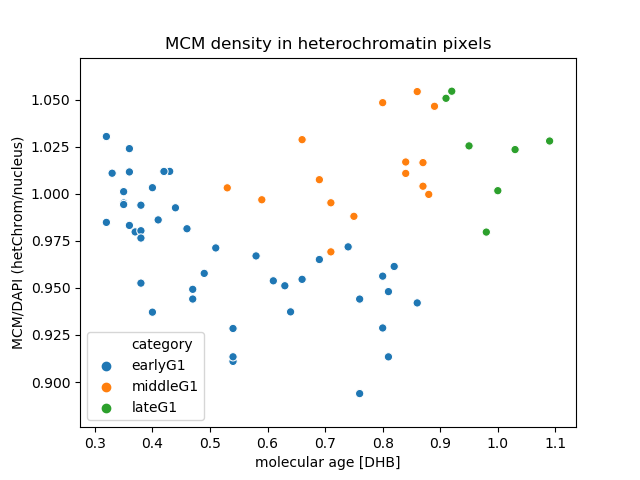

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [67]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


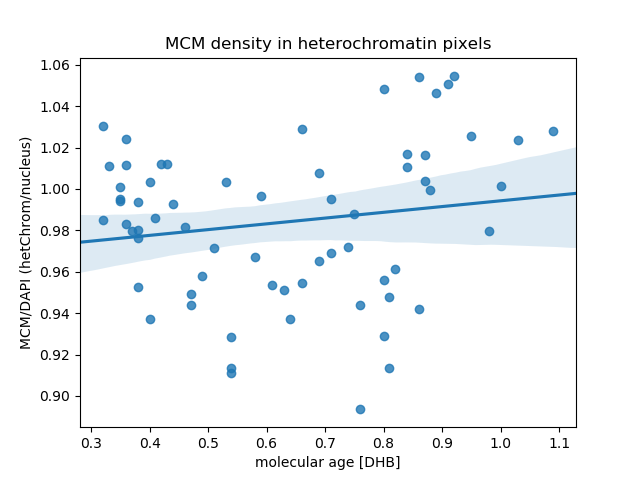

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [68]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [69]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [70]:
myTrendDatand=myTrendDatand.append(pd.Series(['original_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## modification

### modification = 0.3, inner

In [71]:
mod=0.3

In [72]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


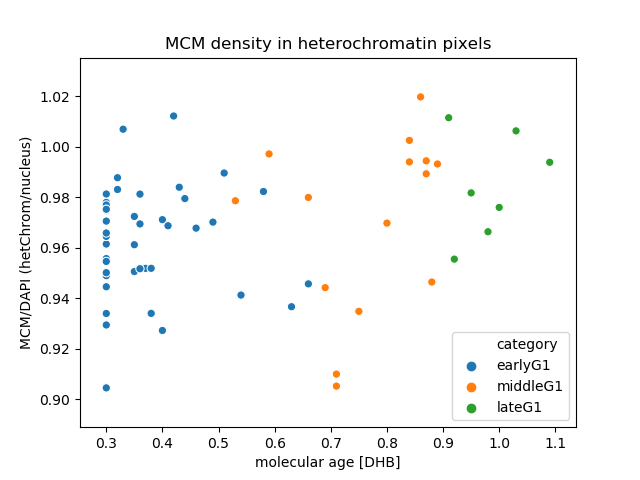

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [73]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


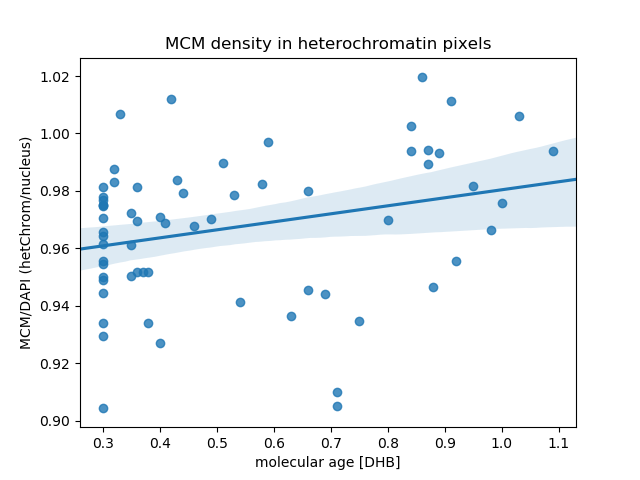

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [74]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [75]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [76]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.3, outer

In [77]:
mod=0.3

In [78]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


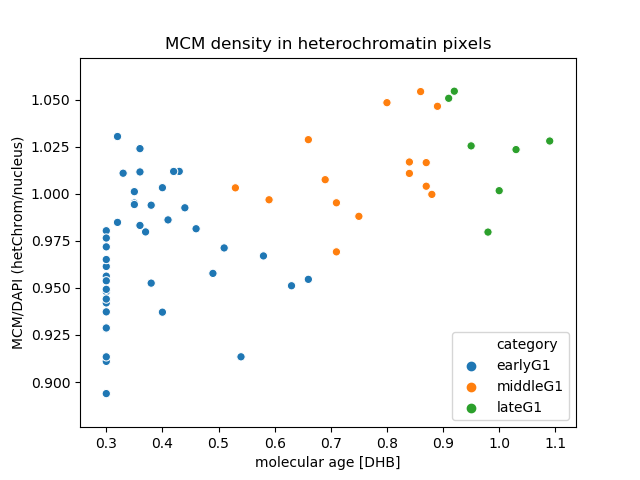

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [79]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


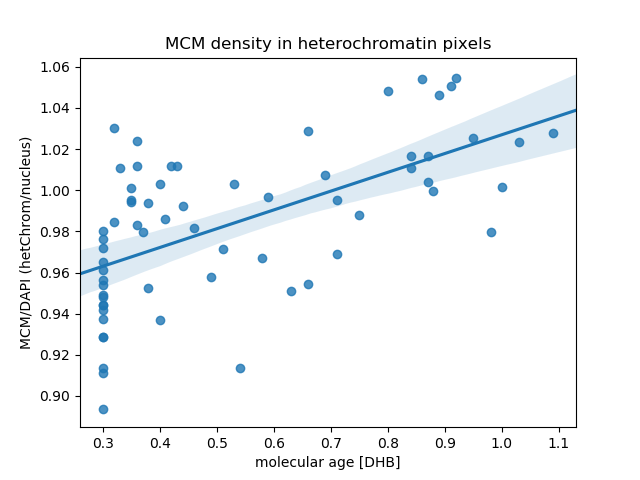

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [80]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [81]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [82]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [83]:
mod=0

In [84]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


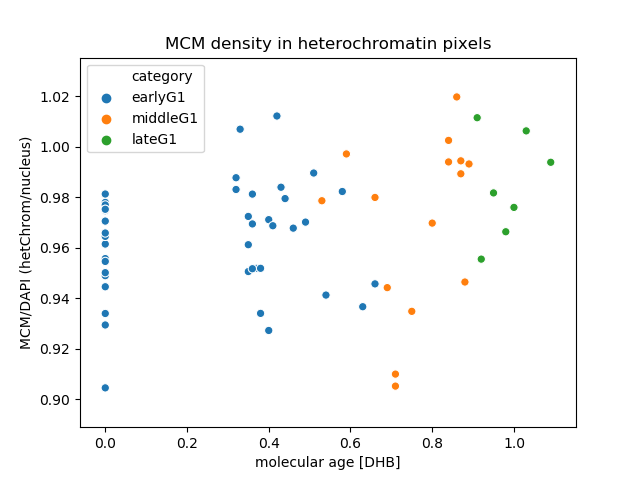

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [85]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


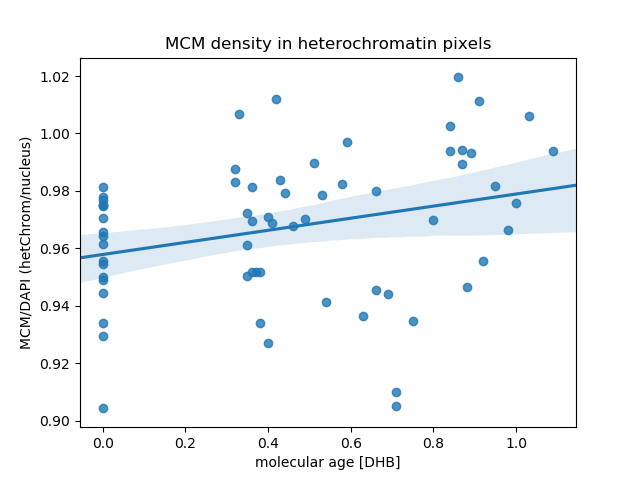

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [86]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [87]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [88]:
myTrendDatand=myTrendDatand.append(pd.Series(['0_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0, outer

<IPython.core.display.Javascript object>


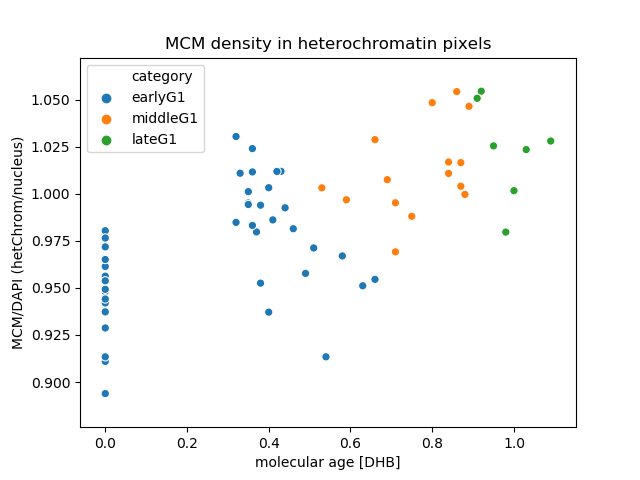

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [89]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


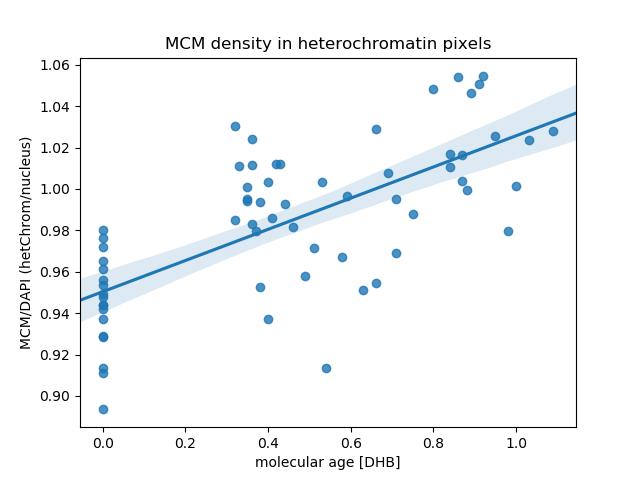

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [90]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [91]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [92]:
myTrendDatand=myTrendDatand.append(pd.Series(['0_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [93]:
mod=0.5

In [94]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


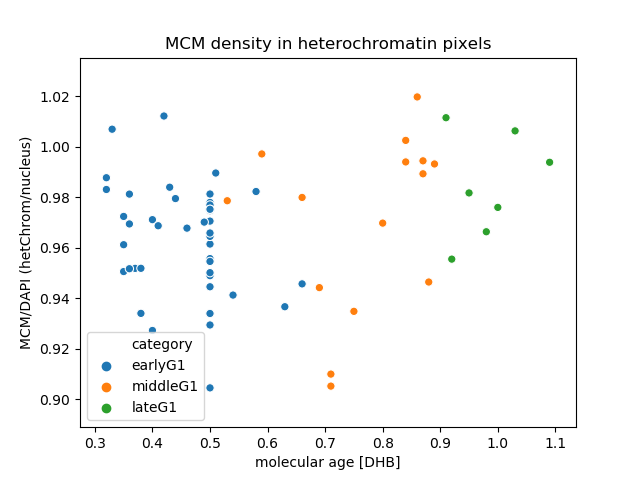

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [95]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


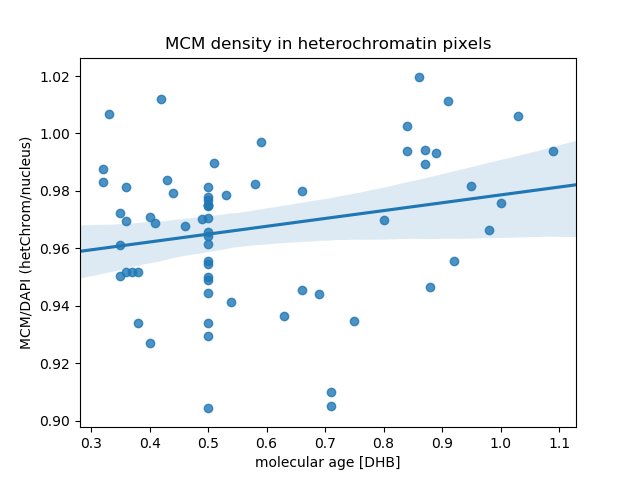

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [96]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [97]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [98]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, outer

<IPython.core.display.Javascript object>


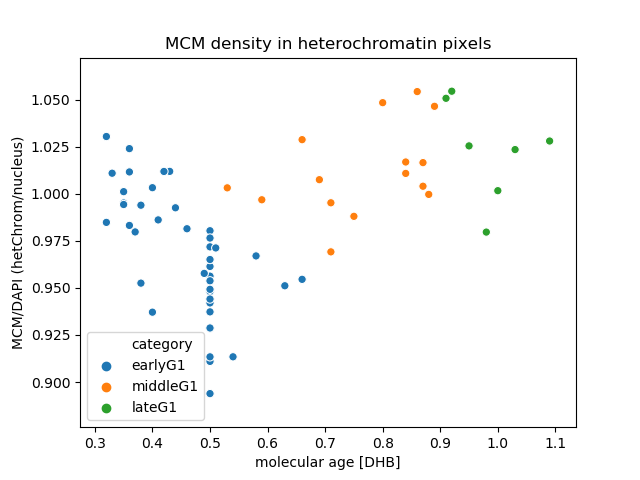

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [99]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


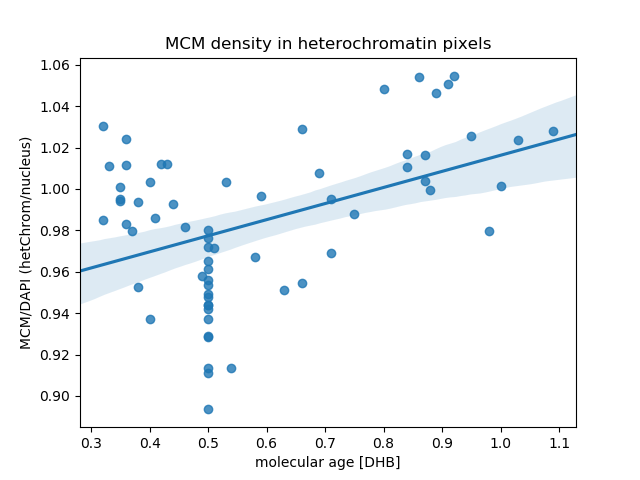

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [100]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [101]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [102]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification

In [103]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd_mol_age_change=myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=-1*myDataSelnd['mol_age_mod']+np.max(myDataSelnd_mol_age_change)

<IPython.core.display.Javascript object>


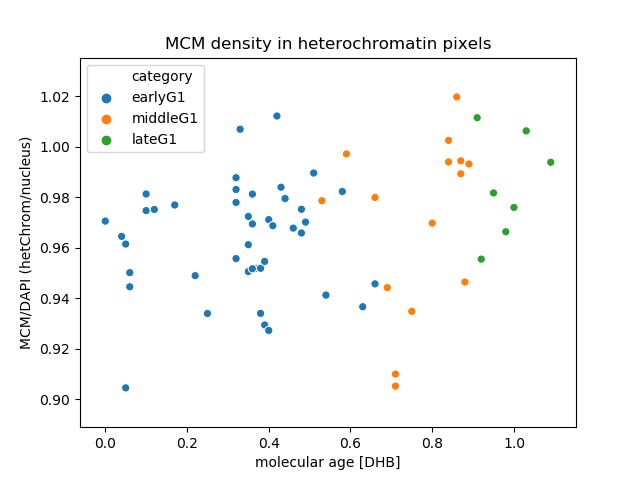

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [104]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


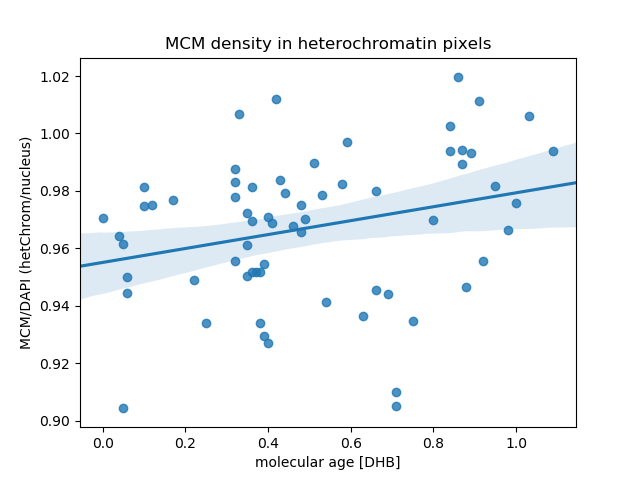

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [105]:
%matplotlib notebook

myDataSelnd['temp']= (myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_inner_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_inner_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [106]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [107]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification, outer

<IPython.core.display.Javascript object>


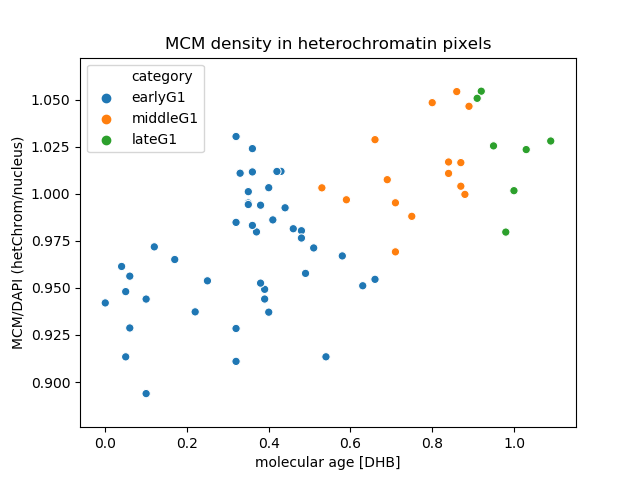

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [108]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


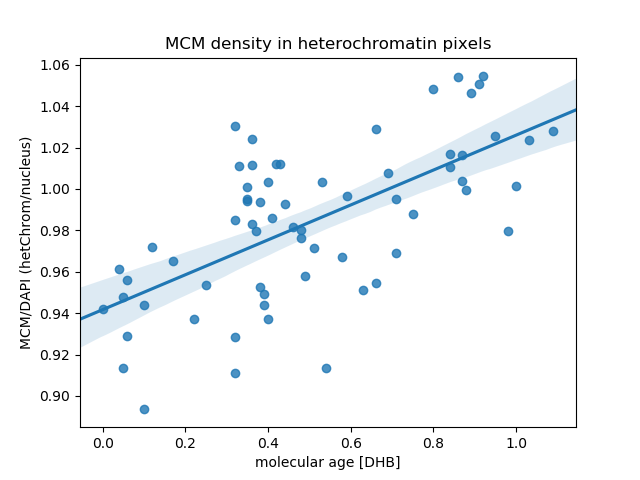

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [109]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_outer_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_outer_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [110]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [111]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# review

In [112]:
myTrendData['pvalue significance']=True
for i, mod in myTrendData.iterrows():
    if myTrendData.at[i,'pvalue']>0.05:
        myTrendData.at[i,'pvalue significance']=False

In [113]:
myTrendDatand['pvalue significance']=True
for i, mod in myTrendDatand.iterrows():
    if myTrendDatand.at[i,'pvalue']>0.05:
        myTrendDatand.at[i,'pvalue significance']=False

In [114]:
myTrendData=myTrendData.sort_index(by='rsquared',ascending=True)

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [115]:
myTrendData

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
4,0_inner,-0.010310,0.961478,-0.073049,0.435815,0.013183,0.005336,False
8,amy_mod_inner,-0.013255,0.963704,-0.088421,0.345239,0.013985,0.007818,False
2,0.3_inner,-0.017581,0.966958,-0.109321,0.242737,0.014972,0.011951,False
1,original_outer,0.023522,0.980835,0.122786,0.189149,0.017806,0.015076,False
6,0.5_inner,-0.023080,0.971378,-0.134850,0.148951,0.015884,0.018184,False
0,original_inner,-0.027163,0.974983,-0.157241,0.091854,0.015978,0.024725,False
7,0.5_outer,0.031201,0.975810,0.164389,0.077839,0.017535,0.027024,False
3,0.3_outer,0.039079,0.971030,0.219123,0.018115,0.016297,0.048015,True
9,amy_mod_outer,0.037170,0.972976,0.223597,0.015832,0.015175,0.049996,True
5,0_outer,0.148135,0.274564,0.271365,0.003214,0.049209,0.073639,True


In [116]:
myTrendDatand

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original_inner,-0.018225,0.980454,-0.146859,0.102192,0.011068,0.021568,False
1,original_outer,0.027401,0.977706,0.165478,0.065146,0.014725,0.027383,False
2,0.3_inner,-0.011670,0.974947,-0.102960,0.253202,0.010166,0.010601,False
3,0.3_outer,0.043430,0.968514,0.287155,0.001167,0.013063,0.082458,True
4,0_inner,-0.006193,0.970922,-0.064753,0.473100,0.008606,0.004193,False
5,0_outer,0.045930,0.969252,0.359903,0.000037,0.010736,0.129530,True
6,0.5_inner,-0.016219,0.978588,-0.131276,0.144486,0.011043,0.017233,False
7,0.5_outer,0.034901,0.973043,0.211714,0.017779,0.014527,0.044823,True
8,amy_mod_inner,-0.009436,0.973309,-0.088698,0.325285,0.009554,0.007867,False
9,amy_mod_outer,0.040283,0.971189,0.283792,0.001340,0.012273,0.080538,True


In [117]:
myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
myDataSel['temp2']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)

In [118]:
len(myDataSel.columns)

109

<IPython.core.display.Javascript object>


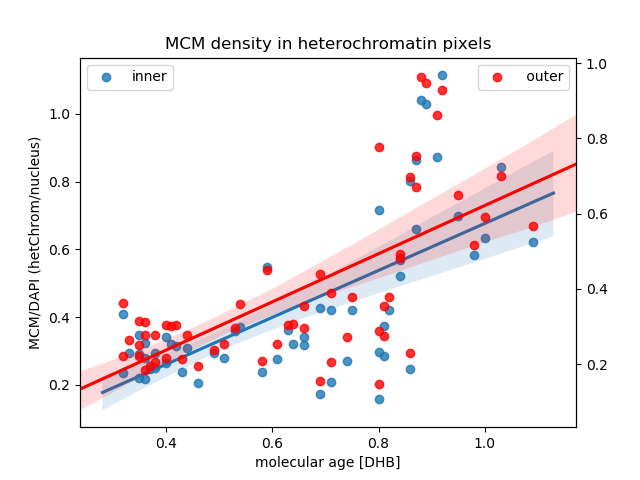

In [119]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.hetChrom_sphere_inner_20_volume)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.hetChrom_sphere_inner_20_volume)
myDataSel['temp2']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.hetChrom_sphere_outer_20_volume)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.hetChrom_sphere_outer_20_volume)

sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:], label = 'inner')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")
plt.legend(loc='upper left')
ax2 = plt.twinx()
sn.regplot(x='molecularAge_ratio', y = 'temp2',data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:], color="r", ax=ax2, label= ' outer')
plt.ylabel("")
plt.legend()

<IPython.core.display.Javascript object>


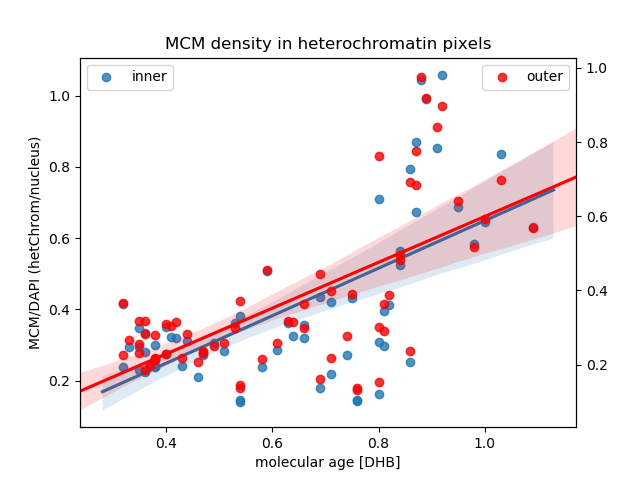

In [120]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.hetChrom_sphere_inner_20_volume)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.hetChrom_sphere_inner_20_volume)
myDataSelnd['temp2']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.hetChrom_sphere_outer_20_volume)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.hetChrom_sphere_outer_20_volume)

sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:], label = 'inner')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")
plt.legend(loc="upper left")
ax2 = plt.twinx()
sn.regplot(x='molecularAge_ratio', y = 'temp2',data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:], color="r", ax=ax2, label = 'outer')
plt.ylabel("")
plt.legend()
